In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [20]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data.describe()
# data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [17]:
data['target'] = california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Convert the data into DMatrix format used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#Printing basic information about the DMatrix
print("Number of training samples in DMatrix:", dtrain.num_row())
print("Number of features in Dmatrix:", dtrain.num_col())

Number of training samples in DMatrix: 16512
Number of features in Dmatrix: 8


Mean Squared Error (MSE) on the test set: 0.2435998341534843
Mean Absolute Error (MAE) on the test set: 0.32973940561491855
R-squared (R²) on the test set: 0.814103964336009


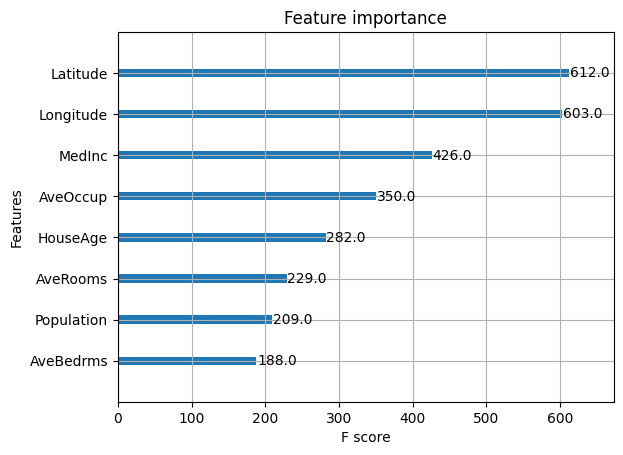

In [18]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5
}


model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
predictions = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE) on the test set: {mse}')
print(f'Mean Absolute Error (MAE) on the test set: {mae}')
print(f'R-squared (R²) on the test set: {r2}')

# Plot feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()
